In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

Load DataSets

In [ ]:
#import summer.csv and dictionary.csv dataset directly from github Repository

summer = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/summer.csv')
economics = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/dictionary.csv')
economics = pd.DataFrame(economics)


In [ ]:
#Display the first 6 data
summer.head(6)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze


In [ ]:
#Display the last 6 data
summer.tail(6)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31159,2012,London,Wrestling,Wrestling Freestyle,"GAJIYEV, Danyal",KAZ,Men,Wg 84 KG,Bronze
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [ ]:
#Display economics, using head
economics.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


Merge 'summer' and 'economics' Datasets based on Country and Code, inner

In [ ]:
summer.rename(columns = {'Country': 'Code'}, inplace = True)

In [ ]:
#Merge summer and economics Inner
olympics = pd.merge(summer, economics, how = 'inner')
olympics


,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.543460
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.543460
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.543460
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.543460
...,...,...,...,...,...,...,...,...,...,...,...,...
25737,2012,London,Athletics,Athletics,"BARRONDO, Erick",GUA,Men,20KM Walk,Silver,Guatemala,16342897.0,3903.478856
25738,2012,London,Athletics,Athletics,"JAMES, Kirani",GRN,Men,400M,Gold,Grenada,106825.0,9212.020352
25739,2012,London,Athletics,Athletics,"AMOS, Nijel",BOT,Men,800M,Silver,Botswana,2262485.0,6360.138220
25740,2012,London,Sailing,Sailing,"KONTIDES, Pavlos",CYP,Men,Laser,Silver,Cyprus,1165300.0,23242.840069


In [ ]:
#Remane 'GDP per Capita' to simply 'GDP'

olympics.rename(columns = {'GDP per Capita': 'GDP'}, inplace = True)
olympics.head(3)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346


There are missing values, although we can replace it, for now we will drop missing values

In [ ]:
#Check for missing value
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25742 entries, 0 to 25741
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        25742 non-null  int64  
 1   City        25742 non-null  object 
 2   Sport       25742 non-null  object 
 3   Discipline  25742 non-null  object 
 4   Athlete     25742 non-null  object 
 5   Code        25742 non-null  object 
 6   Gender      25742 non-null  object 
 7   Event       25742 non-null  object 
 8   Medal       25742 non-null  object 
 9   Country     25742 non-null  object 
 10  Population  25696 non-null  float64
 11  GDP         25142 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 2.6+ MB


In [ ]:
#Drop All Missing Value
olympics = olympics.dropna()
olympics

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.543460
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.543460
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.543460
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.543460
...,...,...,...,...,...,...,...,...,...,...,...,...
25737,2012,London,Athletics,Athletics,"BARRONDO, Erick",GUA,Men,20KM Walk,Silver,Guatemala,16342897.0,3903.478856
25738,2012,London,Athletics,Athletics,"JAMES, Kirani",GRN,Men,400M,Gold,Grenada,106825.0,9212.020352
25739,2012,London,Athletics,Athletics,"AMOS, Nijel",BOT,Men,800M,Silver,Botswana,2262485.0,6360.138220
25740,2012,London,Sailing,Sailing,"KONTIDES, Pavlos",CYP,Men,Laser,Silver,Cyprus,1165300.0,23242.840069


Check Number of Unique Values

In [ ]:
#Check the Number of Unique on the Entire Dataset
olympics.nunique()

Year             27
City             22
Sport            43
Discipline       67
Athlete       18590
Code            118
Gender            2
Event           666
Medal             3
Country         118
Population      118
GDP             118
dtype: int64

What country is the most successful in terms of medal count?

In [ ]:
olympics['Country'].value_counts().head(1)

United States    4585
Name: Country, dtype: int64

What are the top 10 countries in terms of medal count??

In [ ]:
olympics['Country'].value_counts().head(10)

United States     4585
United Kingdom    1720
France            1396
Germany           1305
Italy             1296
Australia         1189
Hungary           1079
Sweden            1044
Netherlands        851
China              807
Name: Country, dtype: int64

Preview on Data Visualization

In [ ]:
#Matplotlib Library
import matplotlib.pyplot as plt

NameError: ignored

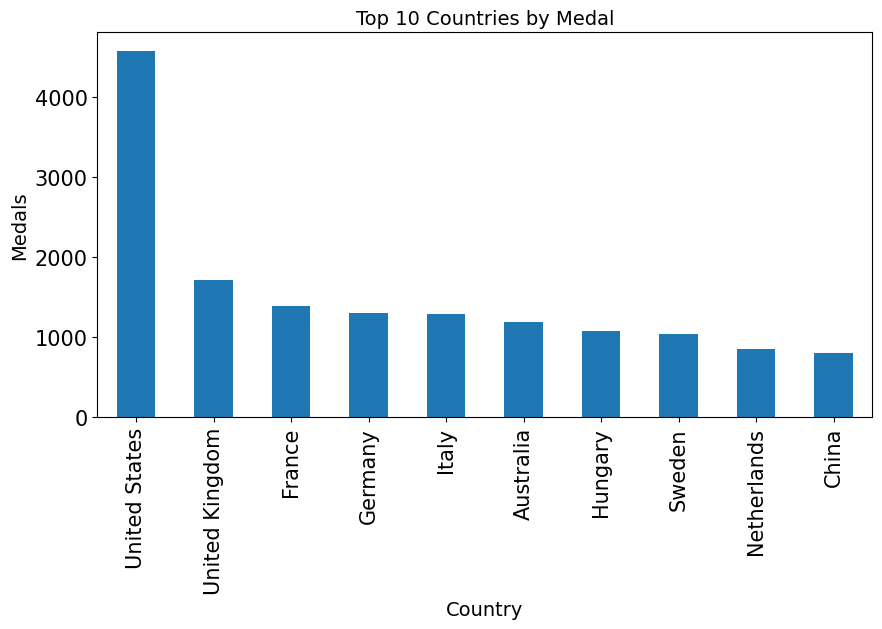

In [ ]:
#Bar Graph (Top 10)

top_10 = olympics['Country'].value_counts().head(10)
top_10.plot(kind = 'bar', fontsize = 15, figsize = (10,5))

plt.title('Top 10 Countries by Medal', fontsize = 14)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Medals', fontsize = 14)

Text(0,0.5, 'Medal')

Do GDP, Population and Politics Matter

In [ ]:
#Sort per Category Top 25 most country with medals
olympics.groupby('Country').count()[['Medal']].sort_values(by = 'Medal',ascending = False).head(25)

,Medal
Country,
United States,4585
United Kingdom,1720
France,1396
Germany,1305
Italy,1296
Australia,1189
Hungary,1079
Sweden,1044
Netherlands,851


In [ ]:
#Get Unique Cities that hosted an Olympic on the dataset
olympics['City'].unique()


array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Amsterdam',
       'Los Angeles', 'Berlin', 'Helsinki', 'Melbourne / Stockholm',
       'Rome', 'Tokyo', 'Mexico', 'Munich', 'Montreal', 'Moscow', 'Seoul',
       'Barcelona', 'Atlanta', 'Sydney', 'Beijing', 'Antwerp'],
      dtype=object)

In [ ]:
#Create Games column (because 1 city hosts multiple Olympic Events)
olympics['Games'] = olympics.apply(lambda x: str(x['Year']) + " " + x['City'], axis = 1)
olympics.head(5)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP,Games
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346,1896 Athens
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346,1896 Athens
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346,1896 Athens
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.54346,1896 Athens
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.54346,1896 Athens


In [ ]:
#Count Number of Medals Given per Year
olympics['Games'].value_counts().head(27)

2008 Beijing                  1945
2004 Athens                   1874
2000 Sydney                   1861
2012 London                   1846
1996 Atlanta                  1727
1992 Barcelona                1313
1920 Antwerp                  1288
1984 Los Angeles              1102
1912 Stockholm                 861
1936 Berlin                    855
1924 Paris                     849
1988 Seoul                     838
1908 London                    777
1948 London                    774
1952 Helsinki                  711
1928 Amsterdam                 682
1968 Mexico                    645
1976 Montreal                  633
1964 Tokyo                     632
1932 Los Angeles               611
1956 Melbourne / Stockholm     605
1972 Munich                    603
1960 Rome                      560
1980 Moscow                    478
1900 Paris                     474
1904 St Louis                  453
1896 Athens                    145
Name: Games, dtype: int64

In [ ]:
#Number of Participation per Country to each Games (Olympic Editions), Top 10

olympics.groupby('Country').apply(lambda x: x['Games'].nunique()).sort_values(ascending = False).head(10)

Country
United Kingdom    27
Denmark           26
France            26
United States     26
Hungary           25
Canada            25
Switzerland       25
Italy             25
Sweden            25
Belgium           24
dtype: int64

In [ ]:
#Create this pivot table for United states and Canada only using aggfunc ='mean'
df_1 = olympics.pivot_table(values = 'GDP', columns = ['Country'], aggfunc = 'mean').loc['GDP',['Canada', 'United States']]
pd.DataFrame(df_1)

,GDP
Country,
Canada,43248.529909
United States,56115.718426
